<a href="https://colab.research.google.com/github/AlessioChen/Computer-Vision-Class/blob/main/SSL_Dataset_and_Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd

import torch
from torch.utils.data import DataLoader, Dataset

from torchvision.io import read_image

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from PIL import Image
import random

In [62]:
class SSLDataset(Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

        self.imgs = dataset.data
        self.targets = dataset.targets

        self.id = 0

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]

        if self.transform:
          img1 = self.transform(image)
          img2 = self.transform(image)

        else:
          img1 = image
          img2 = image

        label1 = label2 = self.id

        self.id += 1
        # same id = positive pair
        return img1, img2, label1, label2

In [63]:
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

# simclr DA pipeline
s=1
size = 32
color_jitter = transforms.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)
transform = transforms.Compose([transforms.RandomResizedCrop(size=size),
                                  transforms.RandomHorizontalFlip(),
                                  transforms.RandomApply([color_jitter], p=0.8),
                                  transforms.RandomGrayscale(p=0.2),
                                  transforms.GaussianBlur(kernel_size=int(0.1 * size)),
                                  transforms.ToTensor()])

# create training set from CustomDataset
trainset = SSLDataset(dataset = dataset, transform=transform)

Files already downloaded and verified


In [64]:
train_dataloader = DataLoader(trainset, batch_size=64, shuffle=True)
print(train_dataloader)

Feature batch shape: torch.Size([64, 3, 32, 32])


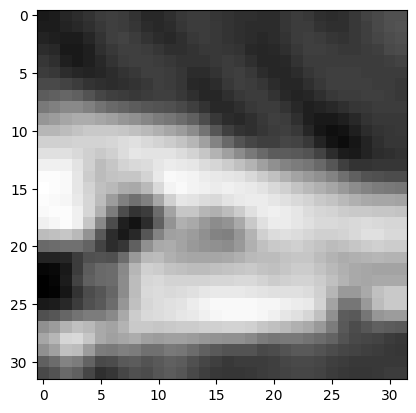

Label: 64


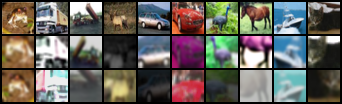

In [66]:
# Display image and label.
train_features_1, train_features_2,  label1, label2 = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features_1.size()}")
img = train_features_1[0][0]
label = label1[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# use this
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)


from torchvision.utils import make_grid
imgs = torch.stack((*[non_augmented[i][0] for i in range(10)], # * is used to unpack images, it is equal to pass 10 images separatly
                    *[trainset[i][0] for i in range(10)],
                    *[trainset[i][1] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)


## Exercise 1
Create the custom training set using the cifar10 images and targets

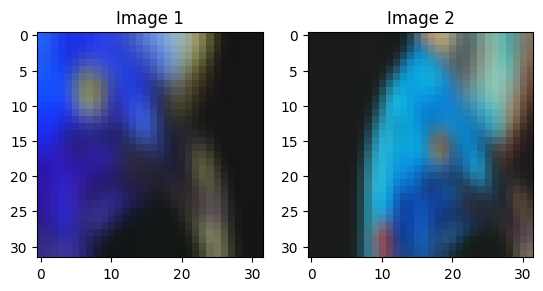

Label: 65


In [67]:
img_1 = train_features_1[1]
img_2 = train_features_2[1]
label = label1[1]

# Display original and augmented images
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_1.permute(1, 2, 0))
axarr[0].set_title("Image 1")
axarr[1].imshow(img_2.permute(1, 2, 0))
axarr[1].set_title("Image 2")
plt.show()
print(f"Label: {label}")

## Exercise 2
Modify the custom dataset to return two different views of an input image and create a train loop as the following example

## Exercise 3

Plot a positive pair and a negative pair of a mini-batch of sample

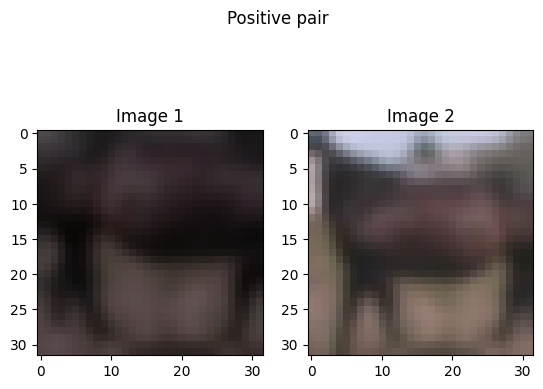

Label1: 512
Label2: 512


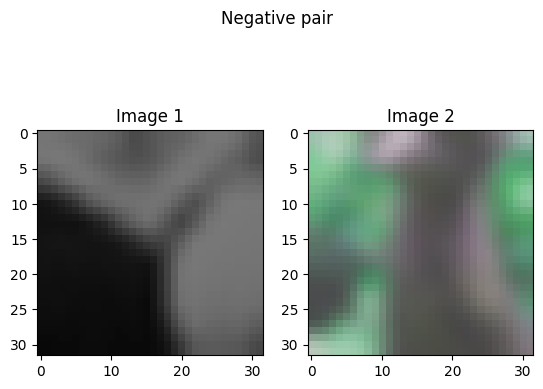

Label1: 513
Label2: 514


In [61]:
for i, data in enumerate(train_dataloader):
  img1, img2, label1, label2 = data


  f, axarr = plt.subplots(1,2)
  f.suptitle('Positive pair')
  axarr[0].imshow(img1[i].permute(1, 2, 0))
  axarr[0].set_title("Image 1")
  axarr[1].imshow(img2[i].permute(1, 2, 0))
  axarr[1].set_title("Image 2")
  plt.show()
  print(f"Label1: {label1[i]}")
  print(f"Label2: {label2[i]}")


  f, axarr = plt.subplots(1,2)
  f.suptitle('Negative pair')
  axarr[0].imshow(img1[i+1].permute(1, 2, 0))
  axarr[0].set_title("Image 1")
  axarr[1].imshow(img2[i+2].permute(1, 2, 0))
  axarr[1].set_title("Image 2")
  plt.show()
  print(f"Label1: {label1[i+1]}")
  print(f"Label2: {label2[i+2]}")

  break